<a href="https://colab.research.google.com/github/Abbhiraami/ML_AI_masters/blob/main/CNN_assignment/CNN_Assg_Waste_Segregation_Abbhiraami_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/data.zip" -d "/content/your_output_folder"

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import PIL
from PIL import Image
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))
print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("PIL version: {}".format(PIL.__version__))
print("Sklearn  version: {}".format(sk.__version__))




TensorFlow version: 2.18.0
Keras version: 3.8.0
numpy version: 2.0.2
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL version: 11.1.0
Sklearn  version: 1.6.1


Load the dataset.

In [ ]:
### Load and unzip the dataset
root_dir='/content/your_output_folder/data/'
### Loading images based on classes
labels=["Cardboard","Food_Waste","Glass","Metal","Other","Paper","Plastic"]
classes=list(np.zeros(len(labels)))
### Loop each folder
def get_images(root_dir:str):
  images_path=[]
  for i in labels:
    images_path.append(root_dir+f"{i}/")
  ### Load images
  for j in range(len(images_path)):
    classes[j]=os.listdir(images_path[j])
    print(f'{labels[j]}: Total number of images {len(classes[j])}')
  return images_path,classes
images_path,classes=get_images(root_dir)

Cardboard: Total number of images 540
Food_Waste: Total number of images 1000
Glass: Total number of images 750
Metal: Total number of images 1000
Other: Total number of images 1010
Paper: Total number of images 1030
Plastic: Total number of images 2295


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


In [ ]:
# Create a function to load the raw images
def load_images(images_path,labels):
  images_list=[ [] for i in range(len(labels)) ]
  labels_list=[]
  for i in range(len(labels)):
    img_files=os.listdir(images_path[i])
    for j in range(len(img_files)):
      img=os.path.join(images_path[i],img_files[j])
      images_list[i].append(np.array(Image.open(img)))
    labels_list.append(np.repeat(labels[i],len(img_files)))
    print(f'{labels[i]}.. completed')

  return images_list,labels_list


In [ ]:
### Alternate way
dataset=image_dataset_from_directory(
    root_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    image_size=(256, 256),
)

Found 7625 files belonging to 7 classes.


In [ ]:
image_batch, label_batch = next(iter(dataset))
image_batch.shape,label_batch.shape

(TensorShape([32, 256, 256, 3]), TensorShape([32, 7]))

### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images
images,label_list=load_images(images_path,labels)
len(images),len(label_list)

Cardboard.. completed
Food_Waste.. completed
Glass.. completed
Metal.. completed
Other.. completed
Paper.. completed
Plastic.. completed


(7, 7)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
images=np.concatenate(images)
label_list=np.concatenate(label_list)
print(images.shape,label_list.shape)

(7625, 256, 256, 3) (7625,)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

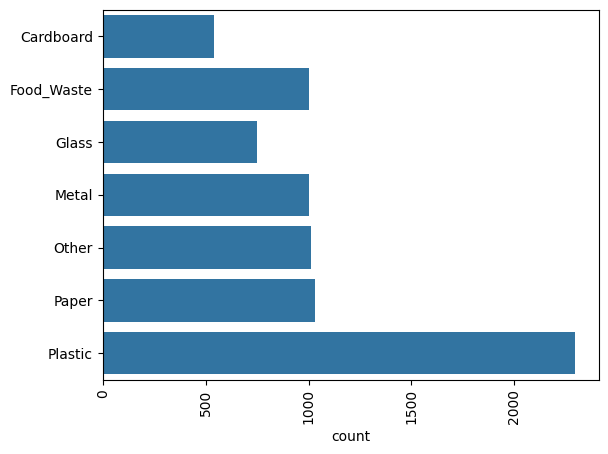

['Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard'] (5, 256, 256, 3)


0         
Plastic       0.300984
Paper         0.135082
Other         0.132459
Food_Waste    0.131148
Metal         0.131148
Glass         0.098361
Cardboard     0.070820
Name: count, dtype: float64

In [ ]:
# Visualise Data Distribution
sns.countplot(label_list,label='Class Distribution')
plt.xticks(rotation=90)
plt.show()
# Get the images and their labels
print(label_list[:5],images[:5].shape)
pd.DataFrame(label_list).value_counts()/len(label_list)

30% of the waste is Plastic, 13% of waste is Paper,others, Food waste and metals each. 9% and 7% of the wastes are cardboard and glass from the given dataset

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

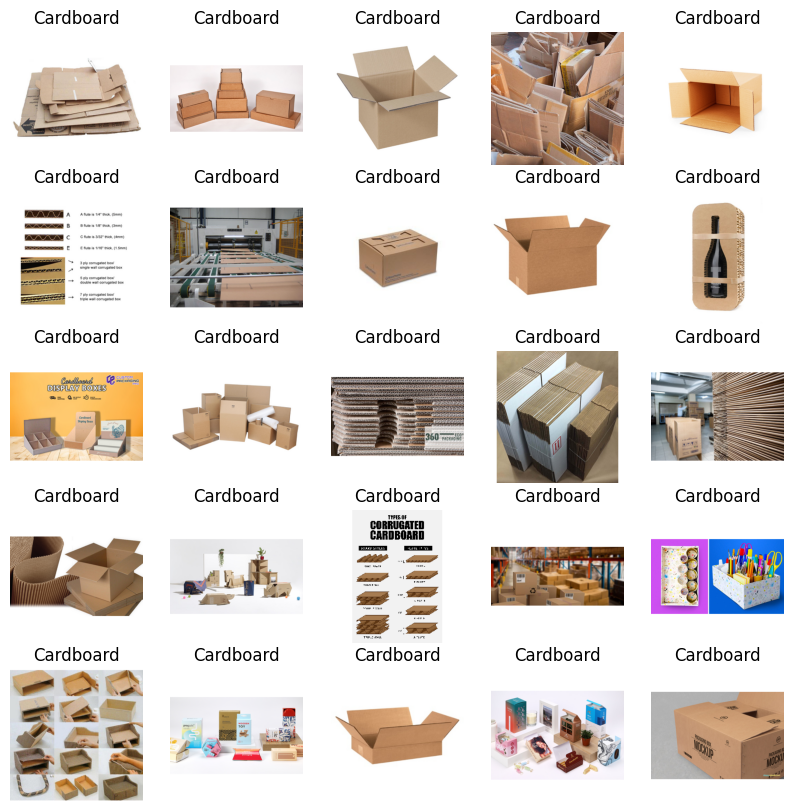

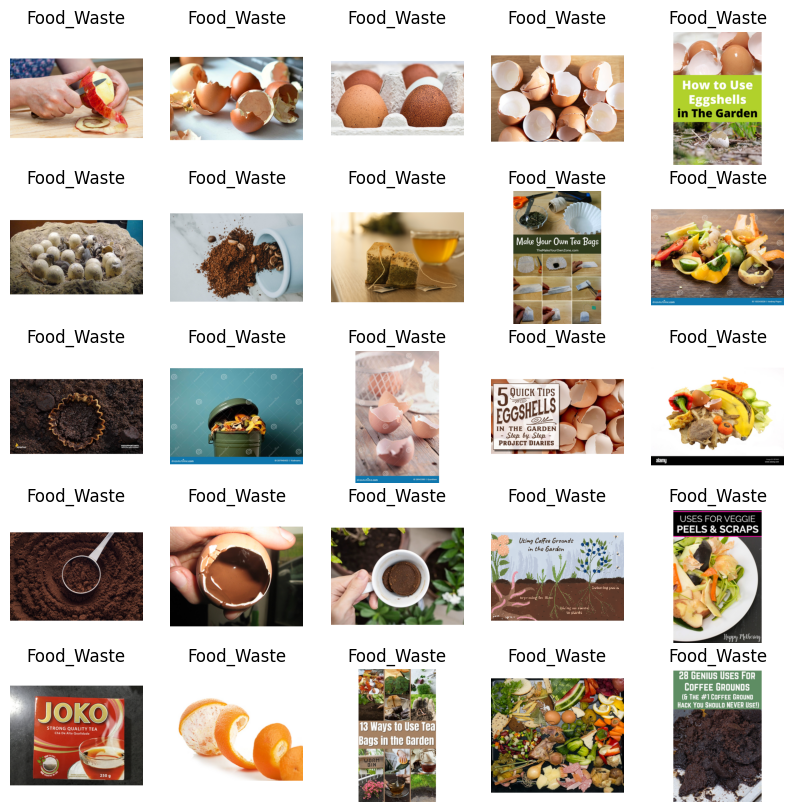

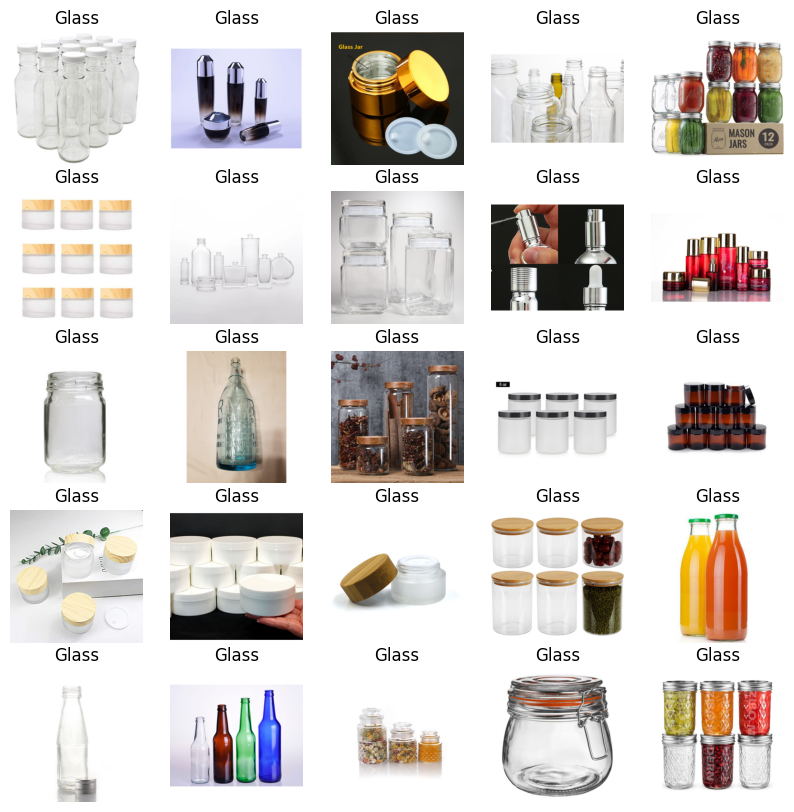

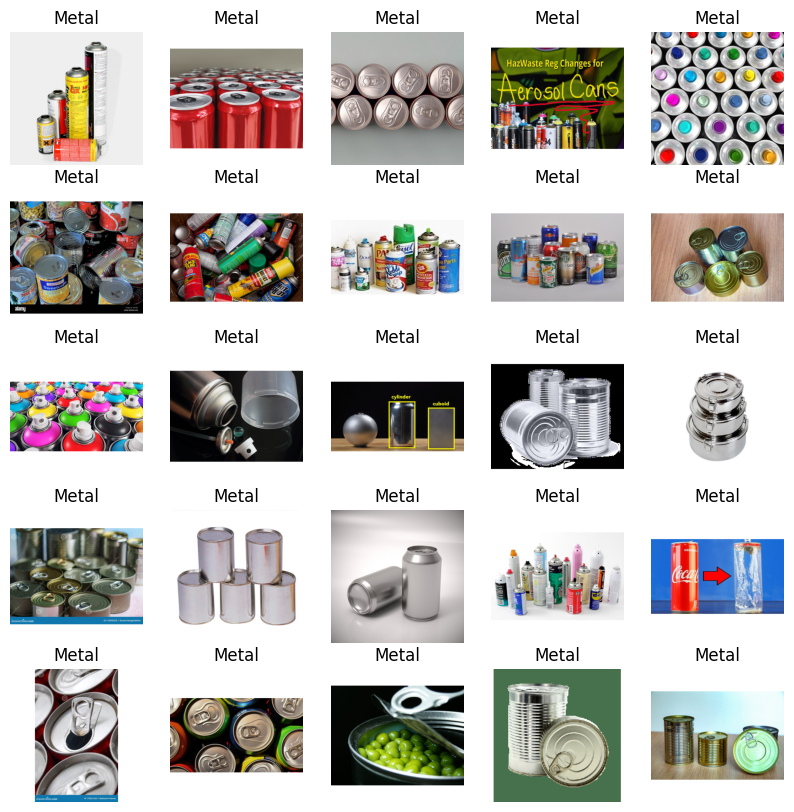

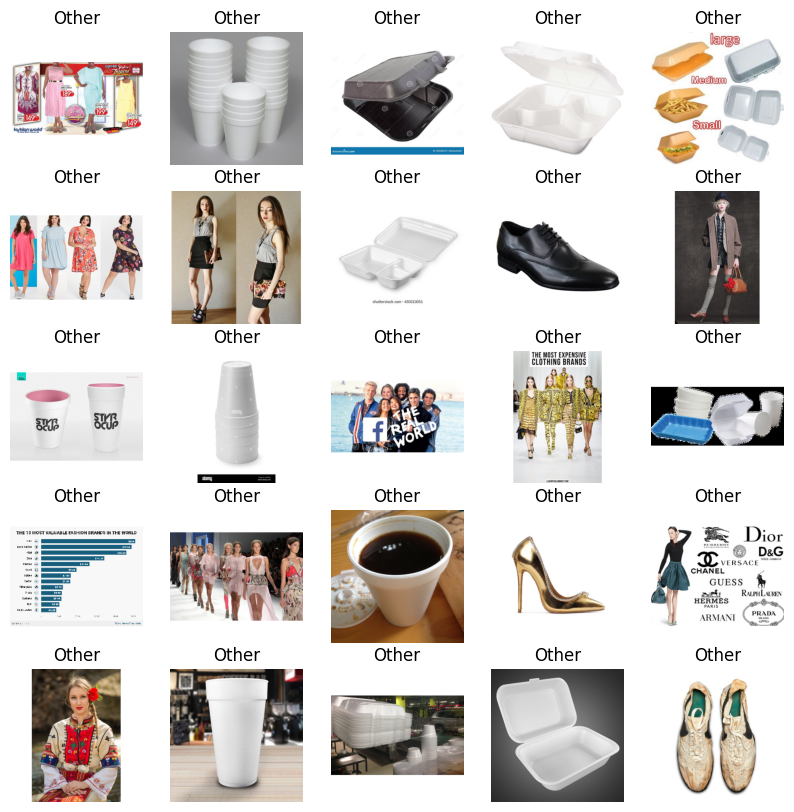

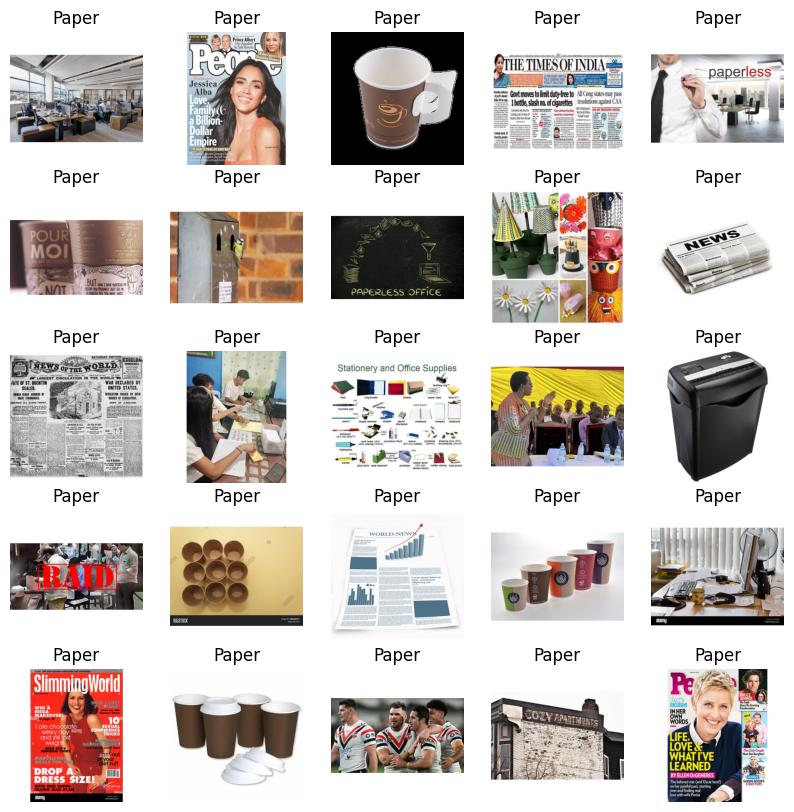

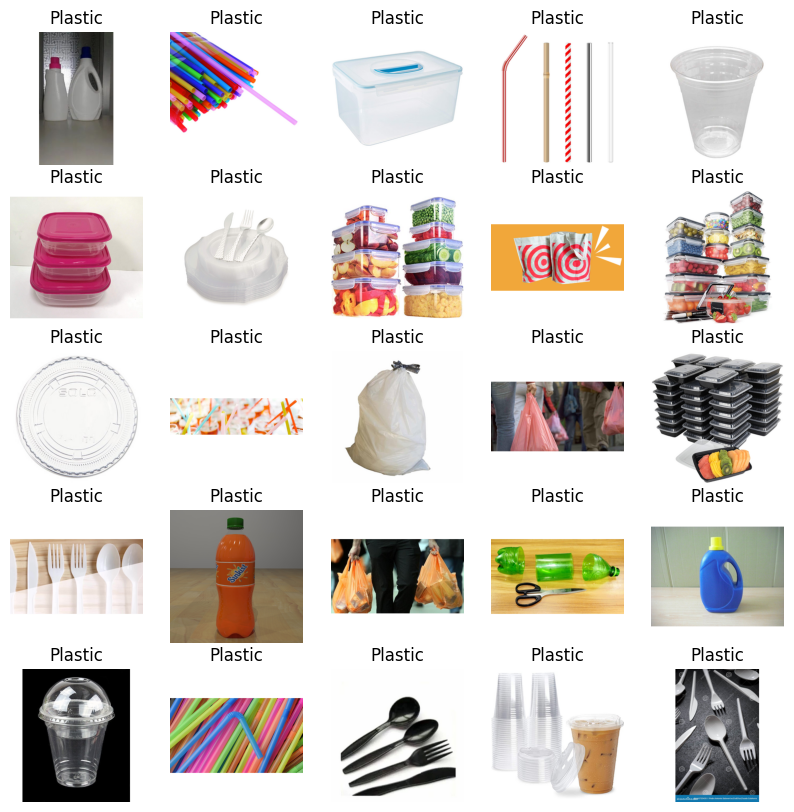

In [ ]:
# Visualise Sample Images (across different labels)

def plot_sample_images(images,label_list,starter=0):
  """
  Input: images and label_list
  Returns: 25 images from the dataset
  """
  fig,ax=plt.subplots(5,5,figsize=(10,10))
  for  axs,i in zip(ax.ravel(),range(starter,starter+25)):
    axs.imshow(images[i])
    axs.set_title(label_list[i])
    axs.axis('off')
  plt.show()

for i in range(7):
  plot_sample_images(images,label_list,starter=i*1000)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set

min_width=0
min_height=0
max_width=0
max_height=0
def check_size(images):
  """
  Input: images
  Returns: min_width,min_height,max_width,max_height
  """
  global min_width,min_height,max_width,max_height
  for image in images:
      image = Image.fromarray(image)
      width, height = image.size
      min_width = min(min_width, width)
      min_height = min(min_height, height)
      max_width = max(max_width, width)
      max_height = max(max_height, height)
  return min_width,min_height,max_width,max_height
min_width,min_height,max_width,max_height=check_size(images)
print(f"Min width: {min_width}, Min height: {min_height}, Max width: {max_width}, Max height: {max_height}")

Min width: 0, Min height: 0, Max width: 256, Max height: 256


In [ ]:
# Resize the image dimensions
## Dimensions are reshaped already - Min width: 0, Min height: 0, Max width: 224, Max height: 224
## Normalize the pixels
IMG_WIDTH = 128  # Reduced image width
IMG_HEIGHT = 128 # Reduced image height

def resize_images(images):
    resized_images = []
    for image in images:
        # Resize the image
        resized_image = Image.fromarray(image).resize((IMG_WIDTH, IMG_HEIGHT))
        resized_images.append(np.array(resized_image))
    return np.array(resized_images)
# Assuming 'images' is your original image data
resized_images = resize_images(images)/255.

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
label_encoder=LabelEncoder()
en_label_list=label_encoder.fit_transform(label_list)
print(f'Sample Encoded labels: {np.random.choice(en_label_list,size=10)}')

Sample Encoded labels: [4 6 0 2 4 6 1 0 6 1]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
X_train,X_val,Y_train,Y_val=train_test_split(images,en_label_list,test_size=0.2,random_state=42)
print(f'X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}')
print(f'X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}')

X_train shape: (6100, 256, 256, 3), Y_train shape: (6100,)
X_val shape: (1525, 256, 256, 3), Y_val shape: (1525,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model
### Build models with several configuration
configs=[
    {'name': 'Config 1','filters':32, 'Kernel_size':(1,1), 'pool_size':(2,2),'activation':'relu','dropout':0.2, 'conv_layers':6},
    {'name': 'Config 2','filters':[64,128,256], 'Kernel_size':[(3,3), (3,3), (3,3)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.4, 'conv_layers':3},
    {'name': 'Config 3','filters':[64,128,256], 'Kernel_size':[(1,1), (1,1), (1,1)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.4, 'conv_layers':3},
    {'name': 'Config 3','filters':[64,128,256], 'Kernel_size':[(5,5), (5,5), (5,5)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.4, 'conv_layers':3},
    {'name': 'Config 5','filters':[32,64,128,256], 'Kernel_size':[(3,3),(3,3), (5,5), (1,1)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.5, 'conv_layers':4},
    {'name': 'Config 6','filters':[16,32,64, 128], 'Kernel_size':[(3,3),(3,3), (5,5), (1,1)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.5, 'conv_layers':4},
    {'name': 'Config 7','filters':[16,32,64, 128], 'Kernel_size':[(3,3),(3,3), (3,3), (3,3)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.5, 'conv_layers':4},
    {'name': 'Config 8','filters':32, 'Kernel_size':(3,3), 'pool_size':(2,2), 'activation':'relu', 'dropout':0.2, 'conv_layers':5},
    {'name': 'Config 9','filters':[32,64,128,256], 'Kernel_size':[(3,3),(3,3), (3,3), (3,3)], 'pool_size':(2,2), 'activation':'relu', 'dropout':0.5, 'conv_layers':4},
]

model_list=[]
def create_model(configuration):
  model=Sequential()
  for i in range(configuration['conv_layers']):
    # print(i)
    if(i==0 and type(configuration['Kernel_size']) !=list):

      model.add(Conv2D(configuration['filters'],configuration['Kernel_size'],input_shape=(max_width,max_height,3),padding='same'))
    elif(i!=0 and type(configuration['Kernel_size']) !=list):
      model.add(Conv2D(configuration['filters'],configuration['Kernel_size'],padding='same'))
    elif(i==0 and type(configuration['Kernel_size']) ==list):
      model.add(Conv2D(configuration['filters'][i],configuration['Kernel_size'][i],input_shape=(max_width,max_height,3),padding='same'))
    else:
      model.add(Conv2D(configuration['filters'][i],configuration['Kernel_size'][i],padding='same'))

    model.add(BatchNormalization())
    model.add(Activation(configuration['activation']))
    model.add(MaxPooling2D(pool_size=configuration['pool_size']))
    # model.add(Dropout(configuration['dropout']))
  model.add(Flatten())

  model.add(Dense(256))
  model.add(Activation(configuration['activation']))
  model.add(Dropout(configuration['dropout']))

  model.add(Dense(7))
  model.add(Activation('softmax'))
    # model_list.append(model)
  return model

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
# %%timeit
epoch=10
batch=32
history_list={}
other_metrics={}


## If the model does not reduce the validation loss, the below config will reduce the learning rate to finer the model
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

### Loop the model through different configurations
for configurations in configs:
  print(f'Processing: {configurations}')
  model=create_model(configurations)
  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  history=model.fit(X_train,Y_train,epochs=epoch,batch_size=batch,validation_data=(X_val,Y_val),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.02,patience=3,restore_best_weights=True),lr_scheduler])
  history_list[configurations['name']]=history.history

  ## Evaluation on the test dataset
  loss, accuracy = model.evaluate(X_val,Y_val)

  ### predict the validation data
  y=model.predict(X_val)
  y_pred=np.argmax(y,axis=1)

  other_metrics[configurations['name']]={'recall': f'{100*recall_score(Y_val,y_pred, average="weighted")}%',
                                          'precision': f'{100*precision_score(Y_val,y_pred, average="weighted")}%',
                                          'f1_score': f'{100*f1_score(Y_val,y_pred, average="weighted")}%'}
  model_list.append([configurations['name'],model])


  print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

Processing: {'name': 'Config 1', 'filters': 32, 'Kernel_size': (1, 1), 'pool_size': (2, 2), 'activation': 'relu', 'dropout': 0.2, 'conv_layers': 6}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.2597 - loss: 2.0143 - val_accuracy: 0.3082 - val_loss: 1.7444 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.3720 - loss: 1.6592 - val_accuracy: 0.4216 - val_loss: 1.5656 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.4249 - loss: 1.5374 - val_accuracy: 0.4518 - val_loss: 1.4874 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.4498 - loss: 1.4606 - val_accuracy: 0.4872 - val_loss: 1.4266 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.4806 - loss: 1.3834 - val_accuracy: 0.5069 - val_loss: 1.3877 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.4950 - loss: 1.3618 - val_accuracy: 0.5167 - val_loss: 1.3702 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 69s 268ms/step - accuracy: 0.2456 - loss: 6.1203 - val_accuracy: 0.2498 - val_loss: 1.8018 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 162ms/step - accuracy: 0.2817 - loss: 1.8505 - val_accuracy: 0.2970 - val_loss: 1.7524 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.2703 - loss: 1.8058 - val_accuracy: 0.2866 - val_loss: 1.7349 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.2908 - loss: 1.7564 - val_accuracy: 0.2518 - val_loss: 1.7825 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.2876 - loss: 1.7496 - val_accuracy: 0.2944 - val_loss: 1.6522 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.3071 - loss: 1.6776 - val_accuracy: 0.2984 - val_loss: 1.6799 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 30s 15

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.2346 - loss: 5.3538 - val_accuracy: 0.2898 - val_loss: 1.8096 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - accuracy: 0.2701 - loss: 1.8394 - val_accuracy: 0.3036 - val_loss: 1.7326 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.3023 - loss: 1.7630 - val_accuracy: 0.2964 - val_loss: 1.7448 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.3158 - loss: 1.7239 - val_accuracy: 0.3016 - val_loss: 1.6830 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.3106 - loss: 1.7104 - val_accuracy: 0.3620 - val_loss: 1.6762 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.3343 - loss: 1.6967 - val_accuracy: 0.3456 - val_loss: 1.7205 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 10

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 80s 305ms/step - accuracy: 0.2660 - loss: 6.3711 - val_accuracy: 0.2925 - val_loss: 1.8510 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 194ms/step - accuracy: 0.3049 - loss: 1.8422 - val_accuracy: 0.2925 - val_loss: 1.7626 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.3065 - loss: 1.8228 - val_accuracy: 0.2925 - val_loss: 1.7716 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.2978 - loss: 1.8261 - val_accuracy: 0.2925 - val_loss: 1.7651 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.3065 - loss: 1.7928
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.3064 - loss: 1.7928 - val_accuracy: 0.2925 - val_loss: 1.7870 - learning_rate: 1.0000e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Loss: 1.7625826597213745, Validation Accuracy: 0.29245901107788086
Processing: {'name': 'Config 5', 'filters': [32, 64, 128, 256], 'Kernel_size': [(3, 3), (3, 3), (5, 5), (1, 1)], 'pool_size': (2, 2), 'activation': 'relu', 'dropout': 0.5, 'conv_layers': 4}
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.2485 - loss: 2.9035 - val_accuracy: 0.3416 - val_loss: 1.7607 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.3114 - loss: 1.7922 - val_accuracy: 0.3502 - val_loss: 1.6867 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.3056 - loss: 1.7356 - val_accuracy: 0.3541 - val_loss: 1.6297 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.3299 - loss: 1.6819 - val_accuracy: 0.3698 - val_loss: 1.5935 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.3426 - loss: 1.6324 - val_accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.2649 - loss: 2.4631 - val_accuracy: 0.3967 - val_loss: 1.6818 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.3413 - loss: 1.6756 - val_accuracy: 0.4531 - val_loss: 1.5603 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3376 - loss: 1.6307 - val_accuracy: 0.4492 - val_loss: 1.4777 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.3893 - loss: 1.5415 - val_accuracy: 0.4892 - val_loss: 1.4689 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4032 - loss: 1.5091 - val_accuracy: 0.4787 - val_loss: 1.4253 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4364 - loss: 1.4260 - val_accuracy: 0.4800 - val_loss: 1.4004 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.2653 - loss: 2.4966 - val_accuracy: 0.3849 - val_loss: 1.6727 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.3426 - loss: 1.6708 - val_accuracy: 0.4295 - val_loss: 1.5461 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3392 - loss: 1.6275 - val_accuracy: 0.4407 - val_loss: 1.5179 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3859 - loss: 1.5447 - val_accuracy: 0.4898 - val_loss: 1.4749 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.3936 - loss: 1.5052 - val_accuracy: 0.4780 - val_loss: 1.4205 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4299 - loss: 1.4523 - val_accuracy: 0.4734 - val_loss: 1.4280 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.3078 - loss: 1.9178 - val_accuracy: 0.4125 - val_loss: 1.5959 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.4541 - loss: 1.4645 - val_accuracy: 0.4682 - val_loss: 1.4414 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5204 - loss: 1.3157 - val_accuracy: 0.5233 - val_loss: 1.3039 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5589 - loss: 1.2142 - val_accuracy: 0.5410 - val_loss: 1.2879 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6139 - loss: 1.1163 - val_accuracy: 0.5548 - val_loss: 1.2536 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6376 - loss: 1.0212 - val_accuracy: 0.5744 - val_loss: 1.1976 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - ac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 136ms/step - accuracy: 0.2634 - loss: 2.6169 - val_accuracy: 0.2885 - val_loss: 1.7999 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.2958 - loss: 1.7988 - val_accuracy: 0.3574 - val_loss: 1.7107 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.3177 - loss: 1.7419 - val_accuracy: 0.3436 - val_loss: 1.6203 - learning_rate: 1.0000e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.3195 - loss: 1.6897 - val_accuracy: 0.3830 - val_loss: 1.5913 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.3320 - loss: 1.6592 - val_accuracy: 0.3187 - val_loss: 1.5779 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.3141 - loss: 1.6490 - val_accuracy: 0.3744 - val_loss: 1.5879 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/st

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


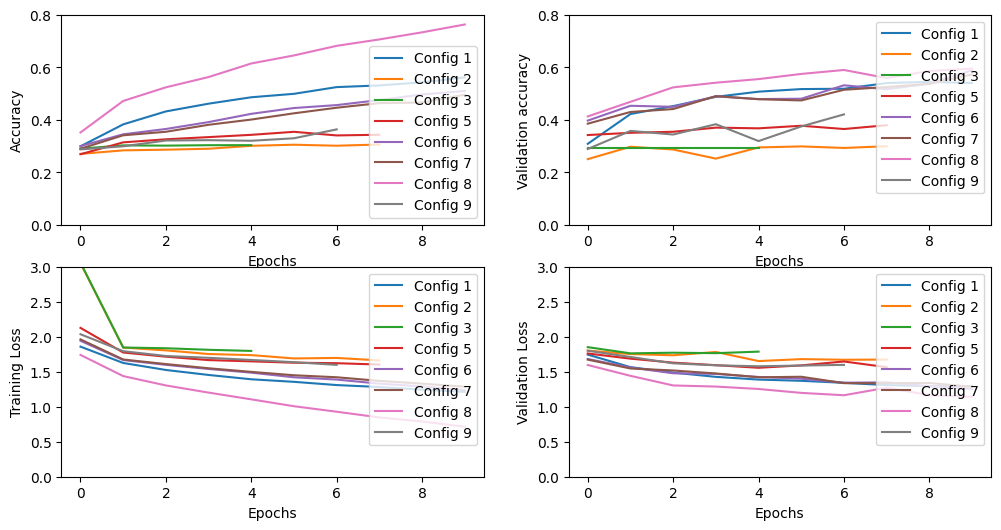

In [ ]:
### plot the history
def plot_history(history_list):
  fig,ax=plt.subplots(2,2,figsize=(12,6))
  for i in history_list:
    ax[0,0].plot(history_list[i]['accuracy'],label=i)
    ax[0,1].plot(history_list[i]['val_accuracy'],label=i)
    ax[1,0].plot(history_list[i]['loss'],label=i)
    ax[1,1].plot(history_list[i]['val_loss'],label=i)

    #### Axis labels #####
    ax[0,0].set_xlabel('Epochs')
    ax[0,1].set_xlabel('Epochs')
    ax[1,0].set_xlabel('Epochs')
    ax[1,1].set_xlabel('Epochs')

    ax[0,0].set_ylabel('Accuracy')
    ax[0,1].set_ylabel('Validation accuracy')
    ax[1,0].set_ylabel('Training Loss')
    ax[1,1].set_ylabel('Validation Loss')

    ### legends ###
    ax[0,0].legend()
    ax[0,1].legend()
    ax[1,0].legend()
    ax[1,1].legend()

    ## similar scale
    ax[0,0].set_ylim(0,0.8)
    ax[0,1].set_ylim(0,0.8)
    ax[1,0].set_ylim(0,3)
    ax[1,1].set_ylim(0,3)

  plt.show()
plot_history(history_list)


Based on the accuracy on the validation set, Config 6, 7 and 8 reduces the loss faster along with better accuracy on the validation set nearly 55-60%. Choosing these config can

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics
# Evaluating and testing is done on the previous cells. Here are the metrics report
history_df=pd.DataFrame(history_list)
configs=list(history_list.keys())
accuracy={}
for i in range(len(configs)):
  accuracy[configs[i]]={'accuracy': f"{100*history_list[configs[i]]['val_accuracy'][-1]}%"}
# pd.DataFrame(accuracy)
accuracy=pd.DataFrame(accuracy)
metrics_report=pd.concat([pd.DataFrame(other_metrics),accuracy],axis=0)
metrics_report.replace("%","",regex=True,inplace=True)
metrics_report=round(metrics_report.astype(float),2)
print(f"Model report on various diagonistic metrocs")
metrics_report

Model report on various diagonistic metrocs


Config 1  Config 2  Config 3  Config 5  Config 6  Config 7  \
recall        53.97     29.44     29.25     36.72     58.82     57.25   
precision     54.56     16.68      8.55     21.00     60.39     60.54   
f1_score      52.32     14.06     13.24     23.94     56.77     55.10   
accuracy      53.97     29.90     29.25     37.90     58.82     57.25   

           Config 8  Config 9  
recall        59.48     38.30  
precision     60.33     40.94  
f1_score      58.86     29.79  
accuracy      59.48     42.03

The Model report above clearly states that Config 8 with ~60% precision, recall, f1 score and accuracy on the test/validation set. Data Augmentation can be done further on config 8 and may be on also on the second and third best configs - Config 6 and 7

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
   - Dataset comprises 7 image classes with varied dimensions. Plastic's waste proportion outweighs the

   - The images were uniformly sized with dimension 256x256. Further normalizing or resizing corrupts  the image and crashes the train_test_split due to exhaustion of RAM capacity

   - Resizing all images before training increased memory load, leading to Colab kernel crashes.

   - Data augmentation (rescaling, flipping, rotation) worsened RAM usage during training. Hence not performed moreover worsen the performance of the model.

* Report model training results
 - Model performance (accuracy, precision, F1-score) averaged between 55–60%.

 - Among several configurations tested, Config 8 with 32 filters and kernel size (3,3) delivered the best results (~60% accuracy).
    - F1 score for Config 8 is close to the accuracy and other model metrics like precision recall which gives a confidence of imbalanced distribution of data still classifies the new images 60% of times correctly.

  - Larger models or deeper layers didn’t improve performance significantly. Adding denser layer significantly pulled the performance down

  - Optimization is limited by memory; future work may use generators or cloud GPUs. Given the fact that google colab GPU is limited. The accuracy of the model couldn't be uplifted further
   - To improve the training and testing efficiency. Hyperparameter tunnings like:
      - Early stopping with not improved accuracy and reduction in loss ratio for atleast 3 epochs
      - Dynamic learning rate with the help of ReduceLRonPlateau were used to train and validate dataset better.

